In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import importlib
from pathlib import Path
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
from joblib import Parallel, delayed
from itertools import product
from collections import defaultdict
import matplotlib.pyplot as plt

# 设定项目根目录
project_root = Path(os.getcwd()).parent
sys.path.append(str(project_root))

# 导入数据
processed_path = Path(project_root) / 'data' / 'processed'
learning_data = pd.read_csv(processed_path / 'Task2_processed.csv')

# 导入模型
from src.Bayesian_state import *
from src.Bayesian_state.problems import *

INFO:cat-learning:logger is running normally.


d:\Research\nips_reviewing\CategoryLearning\StateBased\CategoryLearning\logs\Run_20251120_170110.log
{'base_model': {'modules': {'likelihood_mod': {'class': 'src.Bayesian_state.problems.modules.likelihood.LikelihoodModule', 'kwargs': {}}}, 'agenda': ['likelihood_mod', '__self__']}, 'default_model': {'modules': {}, 'agenda': ['__self__']}, 'm_model': {'modules': {'likelihood_mod': {'class': 'src.Bayesian_state.problems.modules.likelihood.LikelihoodModule', 'kwargs': {'beta': 5.0}}, 'memory_mod': {'class': 'src.Bayesian_state.problems.modules.memory.DualMemoryModule', 'kwargs': {'w0': 0.8, 'gamma': 0.8}}}, 'agenda': ['likelihood_mod', 'memory_mod']}, 'pmh_model': {'modules': {'perception_mod': {'class': 'src.Bayesian_state.problems.modules.perception.PerceptionModule'}, 'hypo_transitions_mod': {'class': 'src.Bayesian_state.problems.modules.hypo_transitions.FixedNumHypothesisModule', 'kwargs': {'fixed_hypo_num': 30, 'init_strategy': 'random', 'transition_mode': 'top_posterior', 'throw_num

In [3]:
h = Partition(4,4)

Initializing Partition: Calculating similarity matrix for 116 hypotheses using 100000 samples...
Similarity matrix calculation complete.


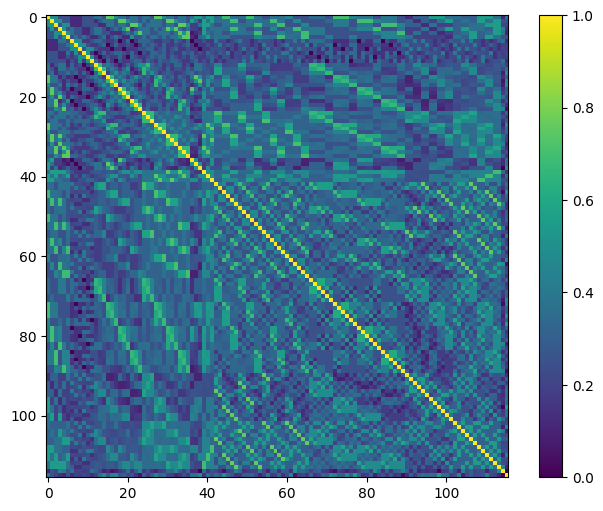

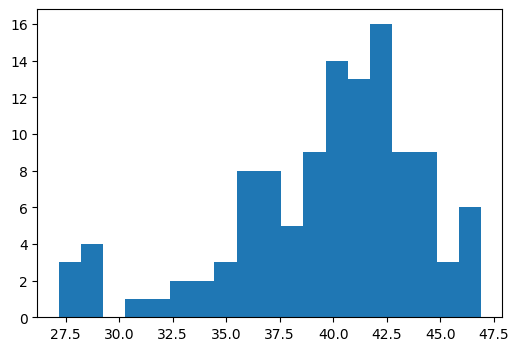

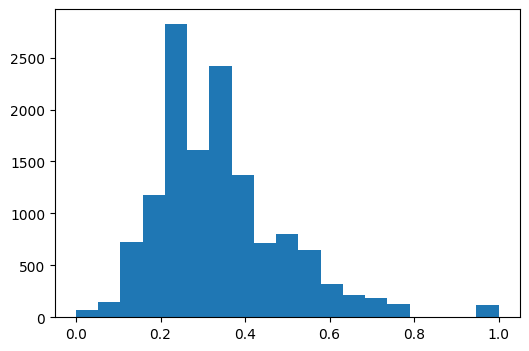

average similarity: 0.342300098097503
min similarity: 0.0
std: 0.15069519029561151


In [5]:
similarity_matrix = h.similarity_matrix

# visualize similarity matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(similarity_matrix, cmap="viridis")
plt.colorbar()
plt.show()

# histogram
plt.figure(figsize=(6,4))
obj = similarity_matrix.sum(axis=0)
plt.hist(obj, bins = np.linspace(obj.min(), obj.max(), num=20))
plt.show()

plt.figure(figsize=(6,4))
obj = similarity_matrix.flatten()
plt.hist(obj, bins = np.linspace(obj.min(), obj.max(), num=20))
plt.show()

print(f"average similarity: {similarity_matrix.mean()}\nmin similarity: {similarity_matrix.min()}\nstd: {similarity_matrix.std()}")

In [5]:
sim_1_and_6 = h.similarity_matrix[0, 5]

In [6]:
splits = h.get_all_splits()

In [7]:
centers = h.get_centers()

In [8]:
split_type, hyperplanes = splits[115]

categories = h.generate_category_inequalities(split_type, hyperplanes)

In [9]:
subject_id = 2
subject_data = learning_data[learning_data["iSub"] == subject_id]
s_data = (
    subject_data[["feature1", "feature2", "feature3", "feature4"]].values,
    subject_data["choice"].values,
    subject_data["feedback"].values
)

In [10]:
lik_prototype = h.calc_likelihood_entry(hypo=42, data=s_data, beta=1)

In [11]:
lik_boundary = h.calc_likelihood_entry(hypo=42, data=s_data, beta=1, use_boundary=True)

# -----


In [ ]:
import src.Bayesian_state.problems.model_v1 as model
importlib.reload(model)
from src.Bayesian_state.problems.model_v1 import SingleRationalModel

import src.Bayesian_state.problems.config as config
importlib.reload(config)
from src.Bayesian_state.problems.config import config_base
from src.Bayesian_state.problems import hypo_transitions as ht
importlib.reload(ht)

<module 'src.Bayesian_new.problems.hypo_transitions' from 'C:\\BIGAI\\Repos\\CategoryLearning\\src\\Bayesian_new\\problems\\hypo_transitions.py'>

In [128]:
p = ht.PartitionCluster(4,4, strategy=[(3, "top_posterior"), (5, "ksimilar_centers"), (3, "random")])

In [129]:
p.cluster_transition_strategy

[(3,
  <bound method PartitionCluster._cluster_strategy_top_post of <class 'src.Bayesian_new.problems.hypo_transitions.PartitionCluster'>>),
 (5,
  <bound method PartitionCluster._cluster_strategy_ksimilar_centers of <src.Bayesian_new.problems.hypo_transitions.PartitionCluster object at 0x000001A212A21150>>),
 (3,
  <bound method PartitionCluster._cluster_strategy_random of <class 'src.Bayesian_new.problems.hypo_transitions.PartitionCluster'>>)]

In [130]:
ref = np.random.dirichlet([0.1]*10)
posterior={i:ref[i] for i in range(10)}

In [131]:
posterior, p.centers[7]

({0: 0.0010606642217420468,
  1: 0.6794292568847359,
  2: 0.0259008752637321,
  3: 5.5956405443912064e-05,
  4: 0.00037681571095053257,
  5: 2.5912010974150273e-07,
  6: 0.06965328268306577,
  7: 0.22304756696972577,
  8: 1.3746043126759332e-08,
  9: 0.0004753089944510771},
 ('2d_equality_sum',
  {0: (0.5, 0.5, 0.16666666666666666, 0.5),
   1: (0.5, 0.5, 0.8333333333333334, 0.5),
   2: (0.8333333333333334, 0.5, 0.5, 0.5),
   3: (0.16666666666666666, 0.5, 0.5, 0.5)}))

In [134]:
x=np.argmax(ref)
x

1

In [132]:
p.cluster_transition(posterior=posterior, stimulus=(0.2,0.5,0.5,0.7), proto_hypo_amount=3)

set()
INNER: {1, 6, 7}
{1, 6, 7}
test {1, 6, 7}
candidate_full_center.shape (113, 4, 4)
ref_hypos_center.shape (3, 4)
[0.02031382 0.02031382 0.02207129 0.00684851 0.02207129 0.29797136
 0.05134176 0.00789557 0.00789557 0.00818373 0.02241678 0.10595265
 0.00576669 0.0133446  0.01492753 0.10626771 0.10626771 0.02431477
 0.0133446  0.00576669 0.00468393 0.10595265 0.02241678 0.10595265
 0.04369398 0.0133446  0.01492753 0.10626771 0.10626771 0.02431477
 0.0133446  0.04369398 0.01492753 0.04962666 0.00618047 0.00618047
 0.04962666 0.04962666 0.04962666 0.02031382 0.67994234 0.02207129
 0.02031382 0.68169981 0.02031382 0.02031382 0.02031382 0.02207129
 0.00509104 0.02207129 0.00509104 0.67994234 0.02031382 0.68169981
 0.02031382 0.02207129 0.02031382 0.02207129 0.00684851 0.02207129
 0.02207129 0.00684851 0.02207129 0.00818373 0.10595265 0.02241678
 0.02241678 0.10595265 0.10595265 0.00576669 0.04369398 0.0133446
 0.0133446  0.01492753 0.01492753 0.10626771 0.10626771 0.10626771
 0.10626771 

[1, 36, 6, 7, 8, 40, 43, 46, 54, 56, 25]

In [76]:
p.length

116

In [ ]:
set.difference

In [128]:
match b:
    case Callable() as s:
        print(s)
    case _:
        print("RONS")

<function b at 0x000001B9BF57F560>


In [88]:
partition = Partition(4,4)

In [90]:
len(partition.centers)

116

In [92]:
partition.centers[1]

('2d_axis_pair',
 {0: (0.25, 0.5, 0.25, 0.5),
  1: (0.75, 0.5, 0.25, 0.5),
  2: (0.25, 0.5, 0.75, 0.5),
  3: (0.75, 0.5, 0.75, 0.5)})

In [96]:
data = {}
for _, x in partition.centers:
    for _, y in partition.centers:
        for _, s in x.items():
            for _, t in y.items():
                key = (*s, *t)
                inv = (*t, *s)
                if key in data or inv in data:
                    continue
                data[key] = np.sum((np.array(s) - np.array(t))**2)**0.5

In [104]:
len(data)

10440

In [108]:
%timeit cdist(np.array((0.25,0.5,0.75,0.5)).reshape(1,-1), np.array((0.25,0.5,0.25,0.5)).reshape(1,-1))[0]

2.74 µs ± 7.74 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [102]:
%timeit data.get((*(0.25,0.5,0.75,0.5),*(0.25,0.5,0.25,0.5)), None) or data.get((*(0.25,0.5,0.25,0.5),*(0.25,0.5,0.75,0.5)), None)

314 ns ± 0.488 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [7]:
M = np.random.dirichlet([0.5,]*300, 100).T

In [8]:
M.shape

(300, 100)

In [9]:
teach_id = 4
teaching = M[:, teach_id].copy()

In [13]:
d = [np.random.choice(300, p=teaching) for _ in range(200)]

In [77]:
def decay(gamma, w0, length):
    x = np.arange(length)*np.log(gamma)
    y = 1 / (np.arange(length)+1)
    return w0*y + np.exp(x)*(1-w0)

In [78]:
decay(0.1,0.1,50)

array([1.        , 0.14      , 0.04233333, 0.0259    , 0.02009   ,
       0.01667567, 0.01428661, 0.01250009, 0.01111112, 0.01      ,
       0.00909091, 0.00833333, 0.00769231, 0.00714286, 0.00666667,
       0.00625   , 0.00588235, 0.00555556, 0.00526316, 0.005     ,
       0.0047619 , 0.00454545, 0.00434783, 0.00416667, 0.004     ,
       0.00384615, 0.0037037 , 0.00357143, 0.00344828, 0.00333333,
       0.00322581, 0.003125  , 0.0030303 , 0.00294118, 0.00285714,
       0.00277778, 0.0027027 , 0.00263158, 0.0025641 , 0.0025    ,
       0.00243902, 0.00238095, 0.00232558, 0.00227273, 0.00222222,
       0.00217391, 0.00212766, 0.00208333, 0.00204082, 0.002     ])

In [79]:
def inference(d, M, forget=False, decay_args=(0.1,0.1)):
    prior = np.ones(100)/100
    
    if forget:
        dec = decay(*decay_args, len(d))[::-1]
        log_post = np.log(prior)+(dec.reshape(-1,1)*np.log(M[d])).sum(axis=0)
    else:
        log_post = np.log(prior)+np.log(M[d]).sum(axis=0)
    post = np.exp(log_post - np.max(log_post))
    
    return post / np.sum(post)

In [80]:
inference(d[:10], M)

array([1.81080359e-04, 8.90766150e-11, 4.62968356e-06, 2.66925608e-10,
       9.12395248e-01, 2.76590681e-06, 2.20214977e-07, 4.12072930e-06,
       1.78517474e-02, 2.20726437e-11, 2.48351041e-05, 1.76929697e-06,
       2.24402723e-06, 8.24795742e-08, 1.11229647e-11, 1.56909601e-08,
       6.31591569e-09, 4.21302437e-09, 5.79624653e-06, 3.35363627e-05,
       2.58780798e-08, 1.18547721e-04, 5.26140416e-08, 7.35336991e-05,
       6.63039981e-10, 3.52768083e-07, 1.41032746e-07, 2.60423928e-12,
       4.77738690e-10, 9.88766520e-15, 6.56116281e-10, 2.34876988e-06,
       2.81825392e-10, 3.60959311e-06, 2.07014615e-09, 1.13312773e-07,
       4.76064029e-05, 1.31424811e-07, 3.19376973e-07, 1.49642492e-13,
       1.30007537e-07, 5.44424633e-02, 7.90979385e-08, 5.79885227e-08,
       3.28534014e-08, 8.15404127e-03, 5.24360327e-10, 2.32254489e-10,
       2.02205843e-06, 1.52930469e-05, 9.98889338e-09, 2.99759081e-11,
       3.06769432e-12, 5.31956580e-09, 5.01556246e-07, 3.64356517e-12,
      

In [83]:
inference(d[:200], M, True, (0.5,0.5))

array([4.55141043e-04, 8.38792198e-05, 4.44151629e-04, 1.96249119e-03,
       7.20969825e-01, 7.28573201e-07, 7.95112310e-04, 3.16597511e-03,
       5.97302547e-05, 9.34071016e-04, 3.34519460e-03, 2.87088359e-03,
       3.75907918e-04, 1.27245726e-04, 6.56099490e-03, 2.10179844e-03,
       3.35863784e-05, 1.17722422e-04, 2.68609176e-05, 1.14708755e-05,
       1.44260835e-03, 3.94907982e-03, 5.01767029e-04, 1.73734259e-04,
       1.63457830e-03, 2.26461481e-02, 1.74944870e-06, 1.87477736e-05,
       8.83465310e-05, 1.77754823e-05, 3.09144570e-06, 2.40051989e-05,
       1.19002410e-02, 8.94144928e-04, 3.23753548e-02, 6.10395137e-06,
       1.91691859e-07, 1.63783823e-06, 1.55992834e-03, 1.52015277e-03,
       1.79340725e-03, 2.65875008e-02, 1.53091690e-04, 2.43344746e-03,
       2.60554371e-04, 6.38838408e-03, 3.22226843e-03, 1.77438270e-02,
       1.05635994e-04, 1.15233938e-02, 3.82717384e-03, 5.22408434e-04,
       6.21550814e-04, 6.87882106e-08, 5.81389202e-03, 6.23533540e-04,
      

$$
W(n; \gamma, w_0)=(1-w_0)\gamma^{n} + \frac{w_0}{n}
$$